In [1]:
from pycocotools.coco import COCO

In [7]:
# https://karanchahal.github.io/2018/05/25/Implementing-Object-Detectors-Input-Pipeline/
annFile='./data/cocostuff/stuff_trainval2017/stuff_val2017.json'
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.49s)
creating index...
index created!


In [8]:
def get_image_ids(sample=None):
    # get all category ids
    catIds = coco.getCatIds()
    imgIds = []
    # appending image ids of each category
    for id in catIds:
       imgIds += coco.getImgIds(catIds=id)

    if sample == None:
        # Returning the entire dataset
        return imgIds
    else:
        # Returning a subset of the dataset
        return imgIds[:sample]

In [9]:
catIds = coco.getCatIds()
imgIds = []
# appending image ids of each category
for id in catIds:
    imgIds += coco.getImgIds(catIds=id)

In [ ]:
imgIds, len(imgIds)

In [17]:
img_id = imgIds[0]
image_node = coco.loadImgs(img_id)[0]
image_node

{'license': 3,
 'file_name': '000000343561.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000343561.jpg',
 'height': 428,
 'width': 640,
 'date_captured': '2013-11-15 04:22:48',
 'flickr_url': 'http://farm5.staticflickr.com/4118/4812500977_6b1c83b5c4_z.jpg',
 'id': 343561}

In [59]:
import os
from tqdm import tqdm
from pycocotools.coco import COCO


In [71]:
# Replace 'your_image_name.jpg' with the image name you want to check
image_name_to_check = '000000000143.jpg'



def check_if_files_in_dir_exists_in_coco(dir, image_filenames_dict):
    image_names = os.listdir(dir)
    for image_name_to_check in tqdm(image_names, total=len(image_names)):
        # Check if the image name exists in the COCO annotations
        if image_name_to_check in image_filenames_dict:
            
            image_id = image_filenames_dict[image_name_to_check]
            image_filenames_dict.pop(image_name_to_check)
            print(f"The image name '{image_name_to_check}' exists in the COCO annotations with ID: {image_id}")
        else:
            print(f"The image name '{image_name_to_check}' does not exist in the COCO annotations.")




In [72]:
pwd

'/mnt/d/Code/sketch_detr'

In [73]:
# Load the COCO annotation file
# coco_annotation_file = 'data/cocostuff/stuff_trainval2017/stuff_train2017.json'
coco_annotation_file = 'data/cocostuff/annotations_trainval2017/annotations/instances_train2017.json'
coco = COCO(coco_annotation_file)

# Get all image IDs and their filenames from the COCO annotations
image_ids = coco.getImgIds()
image_filenames_dict = {image['file_name']: image['id'] for image in coco.loadImgs(image_ids)}
check_if_files_in_dir_exists_in_coco("./data/sketchyCOCO/Scene/Annotation/paper_version/trainInTrain/reference_image/", image_filenames_dict)


loading annotations into memory...
Done (t=17.81s)
creating index...
index created!


100%|██████████| 11265/11265 [00:00<00:00, 196071.97it/s]

The image name '000000000025.jpg' exists in the COCO annotations with ID: 25
The image name '000000000034.jpg' exists in the COCO annotations with ID: 34
The image name '000000000049.jpg' exists in the COCO annotations with ID: 49
The image name '000000000072.jpg' exists in the COCO annotations with ID: 72
The image name '000000000081.jpg' exists in the COCO annotations with ID: 81
The image name '000000000109.jpg' exists in the COCO annotations with ID: 109
The image name '000000000143.jpg' exists in the COCO annotations with ID: 143
The image name '000000000149.jpg' exists in the COCO annotations with ID: 149
The image name '000000000151.jpg' exists in the COCO annotations with ID: 151
The image name '000000000154.jpg' exists in the COCO annotations with ID: 154
The image name '000000000257.jpg' exists in the COCO annotations with ID: 257
The image name '000000000309.jpg' exists in the COCO annotations with ID: 309
The image name '000000000312.jpg' exists in the COCO annotations with

In [64]:
# Load the COCO annotation file
coco_annotation_file = 'data/cocostuff/stuff_trainval2017/stuff_val2017.json'
coco_annotation_file = 'data/cocostuff/annotations_trainval2017/annotations/instances_val2017.json'

coco = COCO(coco_annotation_file)

# Get all image IDs and their filenames from the COCO annotations
image_ids = coco.getImgIds()
image_filenames_dict = {image['file_name']: image['id'] for image in coco.loadImgs(image_ids)}
check_if_files_in_dir_exists_in_coco("./data/sketchyCOCO/Scene/Annotation/paper_version/val/reference_image/", image_filenames_dict)


loading annotations into memory...
Done (t=1.09s)
creating index...
index created!


100%|██████████| 542/542 [00:00<00:00, 1175446.11it/s]


# Plot bounding boxes (Sanity Check)

In [76]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
import numpy as np

from pycocotools.coco import COCO

# Train
coco_annotation_file = 'data/cocostuff/annotations_trainval2017/annotations/instances_train2017.json'
train_coco = COCO(coco_annotation_file)
image_ids = train_coco.getImgIds()
train_image2id_map = {image['file_name']: image['id'] for image in train_coco.loadImgs(image_ids)}

# Test
coco_annotation_file = 'data/cocostuff/annotations_trainval2017/annotations/instances_val2017.json'
test_coco = COCO(coco_annotation_file)
image_ids = test_coco.getImgIds()
test_image2id_map = {image['file_name']: image['id'] for image in test_coco.loadImgs(image_ids)}


loading annotations into memory...
Done (t=22.65s)
creating index...
index created!
loading annotations into memory...
Done (t=0.96s)
creating index...
index created!


In [77]:
def get_bbox_annotations(coco, image2id_map, image_path ):
    # Load the categories
    categories = coco.loadCats(coco.getCatIds())
    category_id_to_name = {cat['id']: cat['name'] for cat in categories}
    print(category_id_to_name)
    filename = os.path.basename(image_path)
    # Get image ID using the filename
    img_id = image2id_map[filename]
    
    image_node = coco.loadImgs(img_id)[0]
    print(image_node)

    # Get annotations for the first image (assuming there's only one)
    ann_ids = coco.getAnnIds(imgIds=img_id)
    print(ann_ids)
    annotations = coco.loadAnns(ann_ids)
    # print(f"{annotations}")
    
    bbox_annotations = []
    for ann in annotations:
        category_id = ann['category_id']
        category_name = category_id_to_name[category_id]
        # Bounding box coordinates (x, y, width, height)
        bbox = ann['bbox']
        print(category_name, ann['bbox'])
        bbox_annotations.append(bbox)

    # Save image and its labeled version.
    plt.axis("off")
    img = Image.open(image_path)
    plt.imshow(np.asarray(img))
    # plt.savefig(f"{img_id}.jpg", bbox_inches="tight", pad_inches=0)
    # Plot segmentation and bounding box.
    # coco_annotation.showAnns(anns, draw_bbox=True)
    coco.showAnns(annotations, draw_bbox=True)
    return img_id, bbox_annotations

def plot_bboxes_on_image(image_path, bbox_annotations):
    # Open the image using PIL
    img = Image.open(image_path)
    print(img.size)

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(img)
    bbox_annotations = bbox_annotations[-1]

    # Plot bounding boxes
    for bbox in bbox_annotations:
        # Convert COCO format (x, y, width, height) to matplotlib format (x_min, y_min, width, height)
        x, y, w, h = bbox
        rect = Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.axis('off')
    plt.show()


In [83]:
import scipy.io as sio

## Single Image Analysis

In [280]:
del max

1 bicycle
2 car
3 motorcycle
4 airplane
5 traffic light
6 fire hydrant
7 cat
8 dog
9 horse
10 sheep
11 cow
12 elephant
14 zebra
15 giraffe
INSTANCE_GT: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8), array([296919,    327,    320,    327,    333,    286,    442,    389,
          401,    423,    818,    748,    724,   1161,    774,    953,
         1855]))
CLASS_GT: (array([ 0, 15, 17, 18, 19], dtype=uint8), array([296919,   1855,   2035,   2031,   4360]))
BBOX: (array([ 0, 15], dtype=uint8), array([571104,  43296])) ::: bbox_info shape: (640, 480, 2)
&&&&&&&&&&& 15
result shape: (43296, 2)
minimum, maximum: (array([290, 205]), array([535, 380]))
x,y,w,h------> (205, 290, 175, 245)


(-0.5, 479.5, 639.5, -0.5)

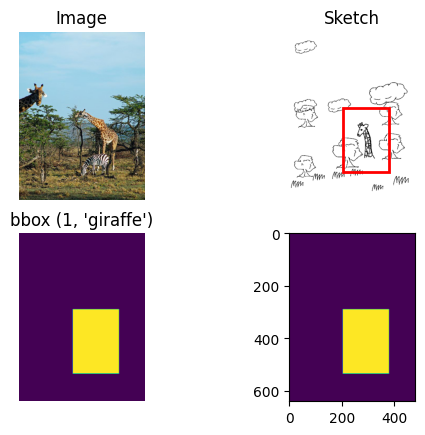

In [282]:
import matplotlib.patches as patches

dir = "./data/sketchyCOCO/Scene/Annotation/paper_version/trainInTrain/reference_image/"
sketch_instances_dir = "./data/sketchyCOCO/Scene/Annotation/paper_version/trainInTrain/"
sketch_dir = "./data/sketchyCOCO/Scene/Sketch/paper_version/trainInTrain/"

filename = "000000003480.jpg" #3 cows
filename = "000000003668.jpg" #multiple instances (diff class)
# filename = "000000012166.jpg" #multiple instances (diff class)
filename = "000000030535.jpg" #multiple instances (diff class)

id = filename.split(".")[0]
image_path = os.path.join(dir, filename)
sketch_path = os.path.join(sketch_dir, filename)

# https://github.com/pinakinathc/fscoco/blob/6d92b9920dca400248769bd18280fdb86378c74d/analysis/labels_intersection.py#L85
sketchycoco_2_cocostuff = {1:2, 2:3, 3:4, 4:5, 5:10, 6:11, 7:17, 8:18, 9:19, 10:20, 11:21, 12:22, 14:24, 15:25, 16:106, 17:124, 18:106, 19:169}
category_map_cocostuff_things = {1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'microwave', 79: 'oven', 80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book', 85: 'clock', 86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush'}
for key in sketchycoco_2_cocostuff.keys():
    try:
        print(key, category_map_cocostuff_things[sketchycoco_2_cocostuff[key]])
    except:
        pass


image = plt.imread(image_path)
sketch = plt.imread(sketch_path.replace("jpg", "png"))

instances_info = sio.loadmat(os.path.join(sketch_instances_dir, "INSTANCE_GT", id+".mat"))["INSTANCE_GT"]
class_info = sio.loadmat(os.path.join(sketch_instances_dir, "CLASS_GT", id+".mat"))["CLASS_GT"]
bbox_info = sio.loadmat(os.path.join(sketch_instances_dir, "BBOX", id+".mat"))["BBOX"]
print(f"INSTANCE_GT: {np.unique(instances_info, return_counts=True)}")
print(f"CLASS_GT: {np.unique(class_info, return_counts=True)}")
print(f"BBOX: {np.unique(bbox_info, return_counts=True)} ::: bbox_info shape: {bbox_info.shape}")

bbox_ids = np.unique(bbox_info)
num_channels = bbox_info.shape[-1]





# plot the image and sketch
figs, ax = plt.subplots(2,max(2, (num_channels)-1))

ax[0,0].imshow(image)
ax[0,0].set_title('Image')
ax[0,0].axis('off')


for channel_idx in range(num_channels-1):
    # print(channel_idx, channel.shape)

    channel_idx += 1 # ignore background
    channel = bbox_info[:,:,channel_idx]
    # print(np.unique(channel))
    # out = np.argwhere(channel>0)
    print("&&&&&&&&&&&", np.unique(channel)[-1])
    sketchy_class_id = np.unique(channel)[-1]
    label = category_map_cocostuff_things[sketchycoco_2_cocostuff[sketchy_class_id]]

    result = np.argwhere(channel == sketchy_class_id)
    print(f"result shape: {result.shape}")
    # print("**************",result)
    minimum = result[0]
    maximum = result[-1]
    print(f"minimum, maximum: {minimum, maximum}")
    y,x = minimum
    h,w = maximum - (y,x)
    final_bbox = x,y,w,h
    print("x,y,w,h------>", final_bbox)
    plt.imshow(channel)
    ax[1,channel_idx-1].imshow(channel)
    ax[1,channel_idx-1].set_title(f'bbox {channel_idx, label}')
    ax[1,channel_idx-1].axis('off')


    
    bbox = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax[0,1].add_patch(bbox)

ax[0,1].imshow(sketch)
ax[0,1].set_title('Sketch')
ax[0,1].axis('off')




# bbox_annotations = get_bbox_annotations(train_coco, train_image2id_map, image_path)


(600, 500)


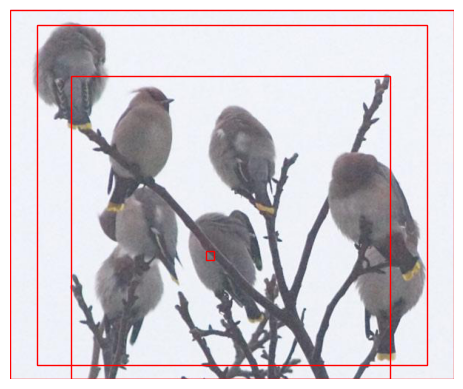

In [30]:
plot_bboxes_on_image(image_path, bbox_annotations)

{1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'micro

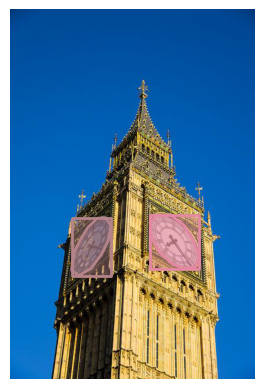

In [102]:
bbox_annotations = get_bbox_annotations(train_coco, train_image2id_map, image_path)


# Crate a COCO dataset

In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy.io as sio

# https://github.com/pinakinathc/fscoco/blob/6d92b9920dca400248769bd18280fdb86378c74d/analysis/labels_intersection.py#L85
sketchycoco_2_cocostuff = {1:2, 2:3, 3:4, 4:5, 5:10, 6:11, 7:17, 8:18, 9:19, 10:20, 11:21, 12:22, 14:24, 15:25, 16:106, 17:124, 18:106, 19:169}
category_map_cocostuff_things = {1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'microwave', 79: 'oven', 80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book', 85: 'clock', 86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush'}



dir = "./data/sketchyCOCO/Scene/Annotation/paper_version/trainInTrain/reference_image/"
sketch_instances_dir = "./data/sketchyCOCO/Scene/Annotation/paper_version/trainInTrain/"
sketch_dir = "./data/sketchyCOCO/Scene/Sketch/paper_version/trainInTrain/"

# Create an empty list to store annotations
annotations = []

# Loop through all the images in the directory
for filename in os.listdir(dir)[:5]:
    if filename.endswith(".jpg"):
        id = filename.split(".")[0]
        image_path = os.path.join(dir, filename)
        sketch_path = os.path.join(sketch_dir, filename)

        image = plt.imread(image_path)
        sketch = plt.imread(sketch_path.replace("jpg", "png"))

        instances_info = sio.loadmat(os.path.join(sketch_instances_dir, "INSTANCE_GT", id + ".mat"))["INSTANCE_GT"]
        class_info = sio.loadmat(os.path.join(sketch_instances_dir, "CLASS_GT", id + ".mat"))["CLASS_GT"]
        bbox_info = sio.loadmat(os.path.join(sketch_instances_dir, "BBOX", id + ".mat"))["BBOX"]
        
        bbox_ids = np.unique(bbox_info)
        num_channels = bbox_info.shape[-1]

        # Create a dictionary to store image information
        image_info = {
            "id": int(id),
            "file_name": filename,
            "width": image.shape[1],
            "height": image.shape[0],
        }

        # Create a list to store annotations for this image
        image_annotations = []
        
        for channel_idx in range(num_channels - 1):
            channel_idx += 1  # ignore background
            channel = bbox_info[:, :, channel_idx]
            sketchy_class_id = np.unique(channel)[-1]
            label = category_map_cocostuff_things[sketchycoco_2_cocostuff[sketchy_class_id]]
            result = np.argwhere(channel == sketchy_class_id)
            minimum = result[0]
            maximum = result[-1]
            y, x = minimum
            h, w = maximum - (y, x)
            final_bbox = [int(x), int(y), int(w), int(h)]

            # Create a dictionary to store annotation for this bbox
            annotation = {
                "id": len(annotations) + 1,
                "image_id": int(id),
                "category_id": sketchy_class_id,
                "bbox": final_bbox,
                "segmentation": [],  # You can fill this if you have segmentation information
                "area": int(w * h),
                "iscrowd": 0,  # Set to 0 for regular objects
            }
            image_annotations.append(annotation)
            annotations.append(annotation)

            # # Add bounding box to the image visualization
            # bbox = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
            # plt.imshow(channel)
            # plt.gca().add_patch(bbox)

        # # Save the image visualization with bounding boxes (optional)
        # plt.title(f"Image: {filename}")
        # plt.axis('off')
        # plt.savefig(f"./visualizations/{filename}")
        # plt.clf()

        image_info["annotations"] = image_annotations

# Create the COCO dataset dictionary
coco_dataset = {
    "info": "",
    "images": [i for i in image_info],
    "categories": [category_info for category_info in category_map_cocostuff_things.values()],
    "annotations": annotations
}

print(coco_dataset)

# Save the COCO dataset as a JSON file
with open("coco_dataset.json", "w") as f:
    json.dump(coco_dataset, f)

print("COCO dataset JSON file created successfully.")


In [81]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy.io as sio


# Create a list to store all image information
images_info = []
annotations = []
# Loop through all the images in the directory
for filename in os.listdir(dir)[:5]:
    if filename.endswith(".jpg"):
        id = filename.split(".")[0]
        image_path = os.path.join(dir, filename)
        sketch_path = os.path.join(sketch_dir, filename)

        image = plt.imread(image_path)
        sketch = plt.imread(sketch_path.replace("jpg", "png"))

        instances_info = sio.loadmat(os.path.join(sketch_instances_dir, "INSTANCE_GT", id + ".mat"))["INSTANCE_GT"]
        class_info = sio.loadmat(os.path.join(sketch_instances_dir, "CLASS_GT", id + ".mat"))["CLASS_GT"]
        bbox_info = sio.loadmat(os.path.join(sketch_instances_dir, "BBOX", id + ".mat"))["BBOX"]
        
        bbox_ids = np.unique(bbox_info)
        num_channels = bbox_info.shape[-1]

        # Create a dictionary to store image information
        image_info = {
            "id": int(id),
            "file_name": filename.replace("jpg", "png"),
            "width": image.shape[1],
            "height": image.shape[0],
        }

        # Create a list to store annotations for this image
        image_annotations = []
        
        for channel_idx in range(num_channels - 1):
            channel_idx += 1  # ignore background
            channel = bbox_info[:, :, channel_idx]
            sketchy_class_id = np.unique(channel)[-1]
            label_id = sketchycoco_2_cocostuff[sketchy_class_id]
            label = category_map_cocostuff_things[sketchycoco_2_cocostuff[sketchy_class_id]]
            result = np.argwhere(channel == sketchy_class_id)
            minimum = result[0]
            maximum = result[-1]
            y, x = minimum
            h, w = maximum - (y, x)
            final_bbox = [int(x), int(y), int(w), int(h)]

            # Create a dictionary to store annotation for this bbox
            annotation = {
                "id": len(annotations)+1 ,
                "image_id": int(id),
                "category_id": label_id,
                "bbox": final_bbox,
                "segmentation": [],
                "area": int(w * h),
                "iscrowd": 0,
            }

            # image_annotations.append(annotation)
            annotations.append(annotation)

        # Add annotations to the image_info dictionary
        # image_info["annotations"] = image_annotations
        images_info.append(image_info)

# Create the COCO dataset dictionary
coco_dataset = {
    "info": "",
    "images": images_info,
    "categories": [{"id":key, "name":value} for key,value in category_map_cocostuff_things.items()],
    "annotations": annotations
}

with open("coco_dataset.json", "w") as f:
    json.dump(coco_dataset, f)

print("COCO dataset JSON file created successfully.")


COCO dataset JSON file created successfully.


In [80]:
coco_dataset

{'info': '',
 'images': [{'id': 25,
   'file_name': '000000000025.jpg',
   'width': 640,
   'height': 426},
  {'id': 34, 'file_name': '000000000034.jpg', 'width': 640, 'height': 425},
  {'id': 49, 'file_name': '000000000049.jpg', 'width': 381, 'height': 500},
  {'id': 72, 'file_name': '000000000072.jpg', 'width': 427, 'height': 640},
  {'id': 81, 'file_name': '000000000081.jpg', 'width': 640, 'height': 425}],
 'categories': [{'id': 1, 'name': 'person'},
  {'id': 2, 'name': 'bicycle'},
  {'id': 3, 'name': 'car'},
  {'id': 4, 'name': 'motorcycle'},
  {'id': 5, 'name': 'airplane'},
  {'id': 6, 'name': 'bus'},
  {'id': 7, 'name': 'train'},
  {'id': 8, 'name': 'truck'},
  {'id': 9, 'name': 'boat'},
  {'id': 10, 'name': 'traffic light'},
  {'id': 11, 'name': 'fire hydrant'},
  {'id': 13, 'name': 'stop sign'},
  {'id': 14, 'name': 'parking meter'},
  {'id': 15, 'name': 'bench'},
  {'id': 16, 'name': 'bird'},
  {'id': 17, 'name': 'cat'},
  {'id': 18, 'name': 'dog'},
  {'id': 19, 'name': 'horse

In [60]:
annotations

[{'id': 1,
  'image_id': 25,
  'category_id': 15,
  'bbox': [384, 59, 213, 296],
  'segmentation': [],
  'area': 63048,
  'iscrowd': 0},
 {'id': 2,
  'image_id': 34,
  'category_id': 14,
  'bbox': [0, 19, 440, 378],
  'segmentation': [],
  'area': 166320,
  'iscrowd': 0},
 {'id': 3,
  'image_id': 49,
  'category_id': 9,
  'bbox': [161, 225, 129, 183],
  'segmentation': [],
  'area': 23607,
  'iscrowd': 0},
 {'id': 4,
  'image_id': 72,
  'category_id': 15,
  'bbox': [135, 128, 288, 498],
  'segmentation': [],
  'area': 143424,
  'iscrowd': 0},
 {'id': 5,
  'image_id': 72,
  'category_id': 15,
  'bbox': [49, 71, 232, 566],
  'segmentation': [],
  'area': 131312,
  'iscrowd': 0},
 {'id': 6,
  'image_id': 81,
  'category_id': 4,
  'bbox': [37, 39, 583, 317],
  'segmentation': [],
  'area': 184811,
  'iscrowd': 0},
 {'id': 7,
  'image_id': 25,
  'category_id': 15,
  'bbox': [384, 59, 213, 296],
  'segmentation': [],
  'area': 63048,
  'iscrowd': 0},
 {'id': 8,
  'image_id': 34,
  'category_

# Delete

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/yaxYKm48q1M?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

